# 2110443 - Computer Vision (2018/1)
## Lab 1 - Introduction
In this lab, we will introduce you tools which often used in our classes OpenCV. OpenCV is a library mainly aimed at real-time computer vision, available in many fundermantal programming languages, such as C++, Java, Javascript and Python

The following code will import OpenCV (cv2) and numpy. In C++ OpenCV, we usually use Mat to warp around almost everything. In the previous years, we typically use C++ as a main lanaguge, however, we saw that C++ Mat usually confuse CV beginner a lot!. Hence,we switch to more simplifiled language, Python. Thanks to OpenCV developer and simplicity of Python, Mat had been warpped around by using well-known numpy array structures (We assume that you are expert in numpy since 2110101 COM PROG!)

In [5]:
import cv2
import numpy as np

## Basic Functionality - Read Image from file
We will use <a href="https://docs.opencv.org/3.4.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56">imread</a>  function to read image from file to our program

In [2]:
inputImage = cv2.imread("assets/lena_std.tif")
print('inputImage variable data type =>', type(inputImage))
print('inputImage variable numpy data type =>', inputImage.dtype)
print('inputImage dimensions', inputImage.shape)

inputImage variable data type => <class 'numpy.ndarray'>
inputImage variable numpy data type => uint8
inputImage dimensions (512, 512, 3)


Show image using OpenCV GUI library <a href="https://docs.opencv.org/3.4.1/d7/dfc/group__highgui.html#ga453d42fe4cb60e5723281a89973ee563">imshow</a>. A window will pop up on your computer. Press enter to close it

In [ ]:
cv2.imshow("Test Image",inputImage) 
cv2.waitKey()
cv2.destroyWindow("Test Image")

Show image using matplotlib

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

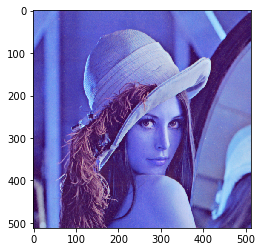

In [4]:
# Image will display inside this notebook cell , however, image look a bit wired isn't it?
plt.imshow(inputImage)
plt.show()

The displayed image looks wired because OpenCV use <b>BGR</b> arragement but matplotlib use RGB array style. Use your old numpy knowledge to swap from BGR to RGB
![title](assets/Lab1-BGR_Arragement.png)

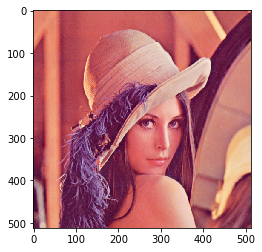

In [5]:
inputImageRGB = inputImage.copy()
### FILL HERE ###
for i,j in np.ndindex(512,512):
    inputImageRGB[i,j,0],inputImageRGB[i,j,2] = inputImageRGB[i,j,2],inputImageRGB[i,j,0]
#################
plt.imshow(inputImageRGB)
plt.show()

You can use OpenCV <a href="https://docs.opencv.org/3.4.1/d7/d1b/group__imgproc__misc.html#ga397ae87e1288a81d2363b61574eb8cab">cvtColor</a> to convert between <a href="https://docs.opencv.org/3.4.1/d7/d1b/group__imgproc__misc.html#ga4e0972be5de079fed4e3a10e24ef5ef0">available colorspace.</a>

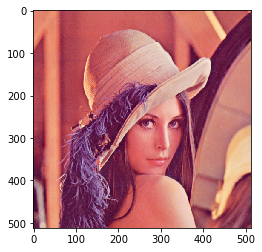

In [6]:
inputImageRGB_cvt = cv2.cvtColor(inputImage,cv2.COLOR_BGR2RGB)
plt.imshow(inputImageRGB_cvt)
plt.show()

## Basic Functionality - Utilize your webcam

Use OpenCV <a href="https://docs.opencv.org/3.4.1/d8/dfe/classcv_1_1VideoCapture.html">VideoCapture</a> and imshow to display image from your webcam

In [ ]:
inputStream = cv2.VideoCapture(0)
try:
    while True:
        _, videoFrame = inputStream.read()

        # videoFrame empty case handler
        if videoFrame is not None:
            cv2.imshow("Live From Webcam", videoFrame)
        else:
            print("Cannot Open Webcam, hw problem?")
            break

        # Press q to close window
        if cv2.waitKey(1) == ord('q'):
            cv2.destroyWindow("Live From Webcam")
            break
except KeyboardInterrupt:
    cv2.destroyWindow("Live From Webcam")
    print ("Stream stopped")
inputStream.release()

Use IPython feature to display image from your webcam inside this notebook

In [6]:
from IPython.display import clear_output
import IPython.display

In [7]:
# You can press "Interupt Kernel Button to stop webcam"
inputStream = cv2.VideoCapture(0)
try:
    while True:
        _, videoFrame = inputStream.read()
        if videoFrame is not None:
            # Encode image as jpg numpy array
            _, buf = cv2.imencode(".jpg", videoFrame)
            # Draw result
            IPython.display.display(IPython.display.Image(data=buf))
            # Discard old outputq
            clear_output(wait=True)
        else:
            print("Cannot Open Webcam, hw problem?")
            break
except KeyboardInterrupt:
    print ("Stream stopped")
inputStream.release()

Stream stopped


Use OpenCV <a href="https://docs.opencv.org/3.4.1/dd/d9e/classcv_1_1VideoWriter.html">VideoWriter</a> to save image stream to video file

In [17]:
inputStream = cv2.VideoCapture(0)
# Retrieve fpd
inputFPS = int(inputStream.get(cv2.CAP_PROP_FPS))
inputWidth = int(inputStream.get(cv2.CAP_PROP_FRAME_WIDTH))
inputHeight = int(inputStream.get(cv2.CAP_PROP_FRAME_HEIGHT))

outputStream = cv2.VideoWriter('outputStream.mp4',
                               cv2.VideoWriter_fourcc('x', '2', '6', '4'),
                               inputFPS, (inputWidth, inputHeight))
try:
    while True:
        _, videoFrame = inputStream.read()
        if videoFrame is not None:
            # Write frame to outputStream
            outputStream.write(videoFrame)
            # Encode image as jpg numpy array
            _, buffer = cv2.imencode(".jpg", videoFrame)
            # Draw result
            IPython.display.display(IPython.display.Image(data=buffer))
            # Discard old output
            clear_output(wait=True)
        else:
            print("Cannot Open Webcam, hw problem?")
            break
except KeyboardInterrupt:
    print("Stream stopped")
outputStream.release()
inputStream.release()

Stream stopped


Open recoded video

In [18]:
inputStream = cv2.VideoCapture('outputStream.mp4')
try:
    while True:
        _, videoFrame = inputStream.read()
        if videoFrame is not None:
            # Encode image as jpg numpy array
            _, buffer = cv2.imencode(".jpg", videoFrame)
            # Draw result
            IPython.display.display(IPython.display.Image(data=buffer))
            # Discard old output
            clear_output(wait=True)
        else:
            print("End of File")
            break
except KeyboardInterrupt:
    print("Stop by user")
inputStream.release()

End of File


## Assignment 1 - Boomerang Clone
We think that some of you already know the popular Boomerang app on smartphone.
In this assignment, we will build a Boomerage clone using your webcam and basic Numpy & OpenCV knowledge. Boomerange video samples are shown below.

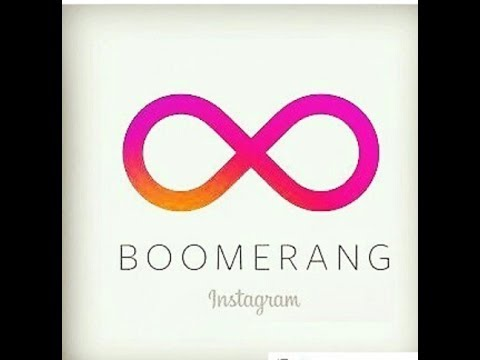

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo(id="OdxmjlqghtU",width=600,height=300)

### Retrieve video from webcam and store in somewhere

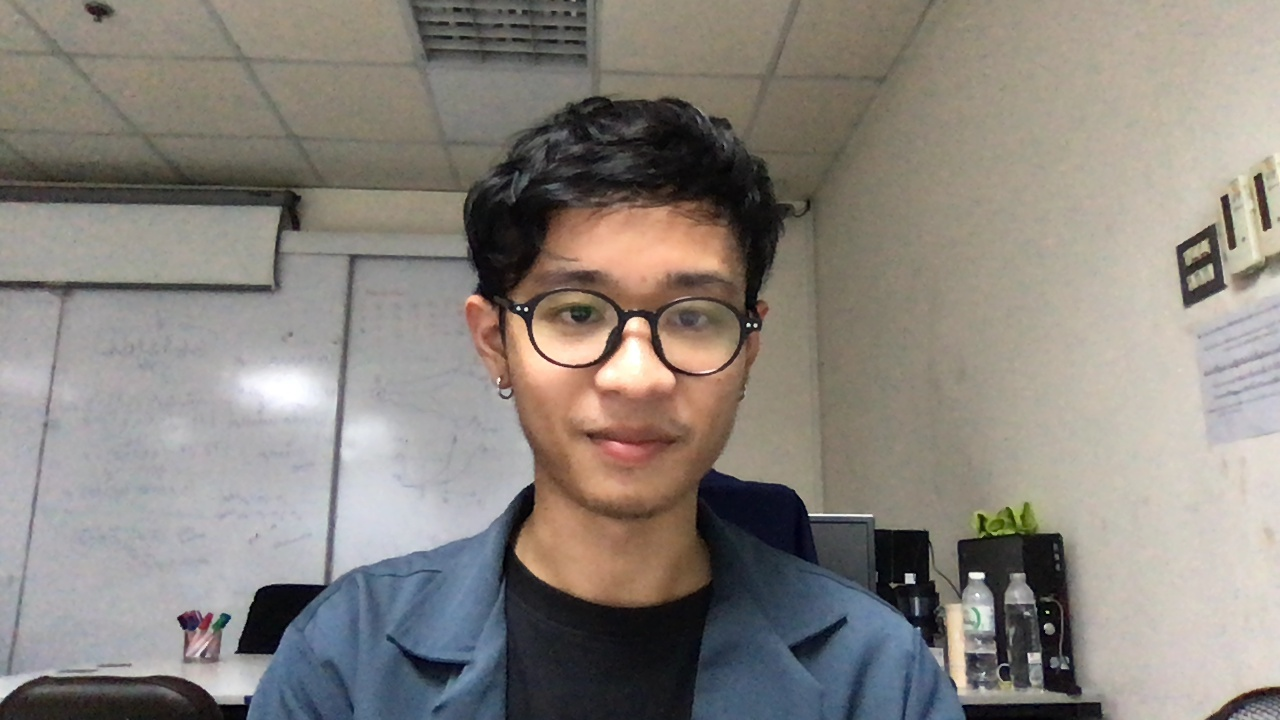

Stream stopped


In [11]:
### FILL HERE ###
videoFrames = []
#################
# Wait 2 second before start
import time
for i in range(2):
    print(str(i)+"!")
    time.sleep(1)
print("Action!")
# Action!
inputStream = cv2.VideoCapture(0)
try:
    while True:
        _, videoFrame = inputStream.read()
        if videoFrame is not None:
            
            ### Do something with videoFrame Here ###
            ### FILL HERE ###
            videoFrames.append(videoFrame)
            #################
            
            # Encode image as jpg numpy array
            _, buf = cv2.imencode(".jpg", videoFrame)
            # Draw result
            IPython.display.display(IPython.display.Image(data=buf))
            # Discard old output
            clear_output(wait=True)
        else:
            print("Cannot Open Webcam, hw problem?")
            break
except KeyboardInterrupt:
    print ("Stream stopped")
inputStream.release()

### Reverse and Concatenate Video

In [12]:
### TODO ###
videoFramesReverse = videoFrames[::-1]
boomerageFrames = videoFrames + videoFramesReverse

### Write them to file

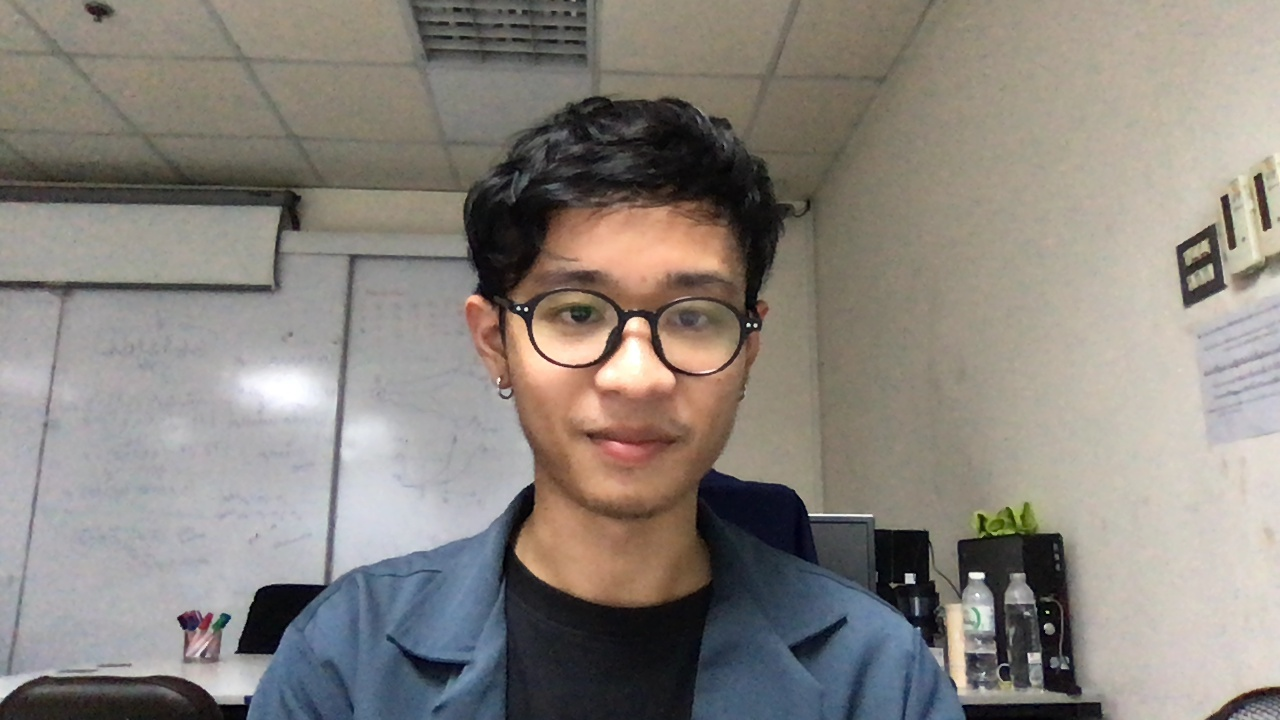

In [13]:
### TODO ###
inputWidth, inputHeight = videoFrames[0].shape[1], videoFrames[0].shape[0]
print(inputWidth,inputHeight)

outputStream = cv2.VideoWriter('outputBoomerang.mp4',
                               cv2.VideoWriter_fourcc('x', '2', '6', '4'),
                               25, (inputWidth, inputHeight))
for frame in boomerageFrames:
        # Write frame to outputStream
        outputStream.write(frame)
        # Encode image as jpg numpy array
        _, buffer = cv2.imencode(".jpg", videoFrame)
        # Draw result
        IPython.display.display(IPython.display.Image(data=buffer))
        # Discard old output
        clear_output(wait=True)
outputStream.release()

In [14]:
inputStream = cv2.VideoCapture('outputBoomerang.mp4')
try:
    while True:
        _, videoFrame = inputStream.read()
        if videoFrame is not None:
            _, buffer = cv2.imencode(".jpg", videoFrame)
            IPython.display.display(IPython.display.Image(buffer))
            clear_output(wait=True)
        else:
            print("EOF")
            break
except KeyboardInterrupt: print('Stream stopped')
inputStream.release()

EOF


## IPyWidget Test Section
Please make sure that after run the following block slider widgets are appear. We will use them in next lab. Press <a href="https://ipywidgets.readthedocs.io/en/stable/user_install.html">here</a> to see installation instruction.

In [1]:
import ipywidgets as widgets
widgets.FloatSlider()

FloatSlider(value=0.0)

In [2]:
widgets.IntSlider()

IntSlider(value=0)